<a href="https://colab.research.google.com/github/Aakriti555/Neural-Network-and-Deep-learning-Assignment-/blob/main/Practical_A5_Aakriti_Banjara_CE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aakriti Banjara
## CE-2020
## Practical Assigment five

# LSTM Basics  

LSTM is a variant of an RNN that resolves the vanishing gradient problem
and retains information in the memory as long as it is required. Basically,
RNN cells are replaced with LSTM cells in the hidden units, as shown in the
following diagram:

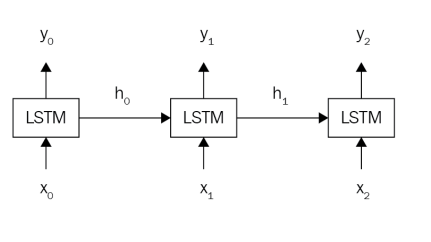

LSTM use three types of gates where the cell effectively keeps information in the memory only as long as required.
- Forget gate
- Input gate
- Output gate  

**Forget Gate**

The forget gate, $ Y_{t} $ , is responsible for deciding what information should be
removed from the cell state (memory).

The forget gate is controlled by a sigmoid function. At time step t, we pass
input $ x_{t}$, and the previous hidden state,$ W_{hy} $ , to the forget gate. It return 0 if
the particular information from the cell state should be removed and returns 1
if the information should not be removed. The forget gate, Y , at a time step, t,
is expressed as follows:

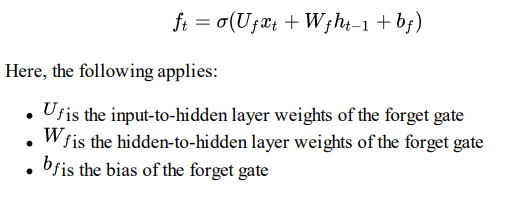

The following diagram shows the forget gate. As you can see, input $ x_{t} $ is
multiplied with $ U_{f} $ and the previous hidden state, $ W_{hy} $, is multiplied with $ W_{f} $,
then both will be added together and sent to the sigmoid function, which
returns $ Y_{t} $, as follows:


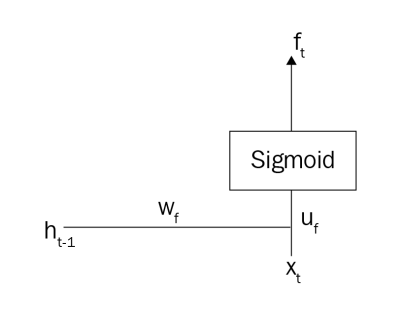

**Input Gate**

The input gate is responsible for deciding what information should be stored
in the cell state.
After the forget gate removes information from the cell state, the input gate
decides what information it has to keep in the memory.

The input gate is controlled by a sigmoid function
that returns output in the range of 0 to 1. If it returns 1, then the particular
information will be stored/updated to the cell state, and if it returns 0, we
will not store the information to the cell state. The input gate i at time step t
is expressed as follows:

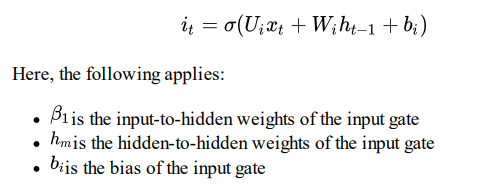

The following diagram shows the input gate:

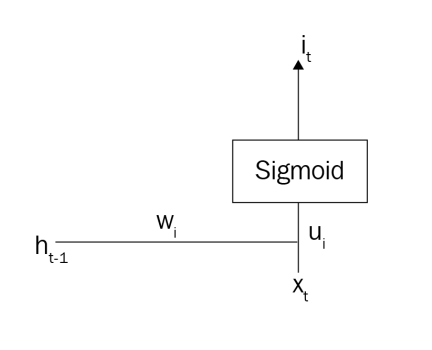


**Output Gate**

The output gate
is responsible for deciding what information should be taken from the cell
state to give as an output. Output gates is also controlled by a sigmoid function.It can be expressed as follows:

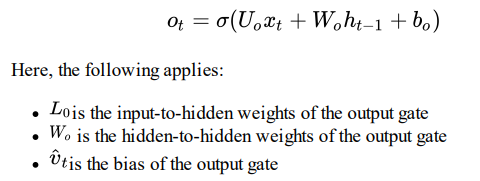

The output gate is shown in the following diagram:

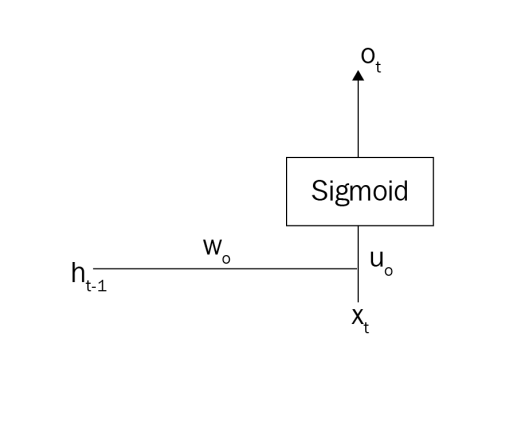


**Updating the cell state**

We need to allow
the values of $ g_{t} $ to be either positive or negative. So, we use the tanh function,
which returns values in the range of -1 to +1

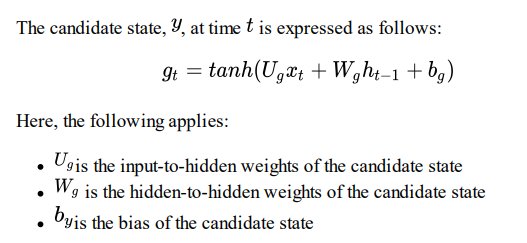

the candidate state holds all the new information that can be added to
the cell state (memory). The following diagram shows the candidate state:
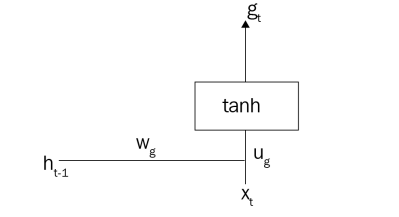

Adding the new information to the cell state with input gate $ i_{t} $ and candidate
state $ g_{t} $is shown in the following diagram:

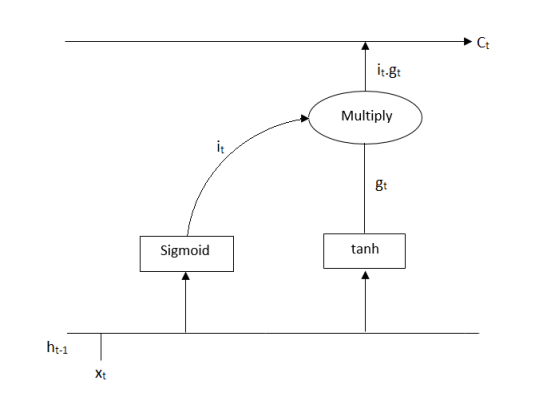

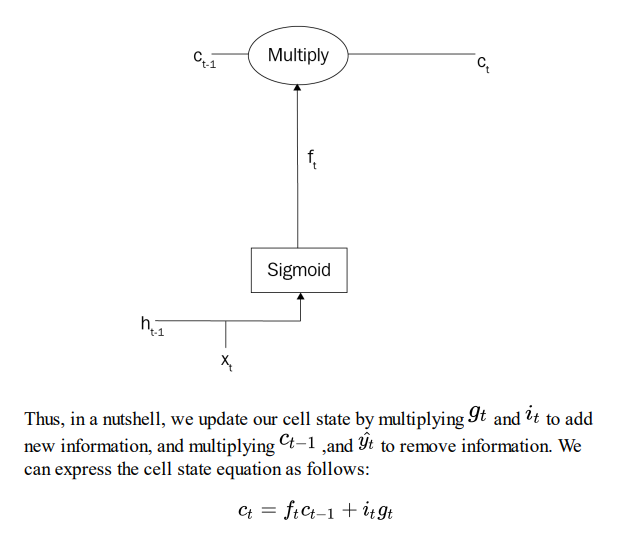

**Updating hidden state**

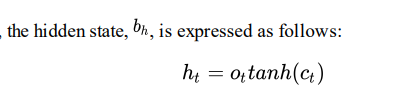


The following diagram shows how the hidden state, $ b_{h} $ , is computed by
multiplying $ V_{t} $ and $ tanh(c_{t}) $:
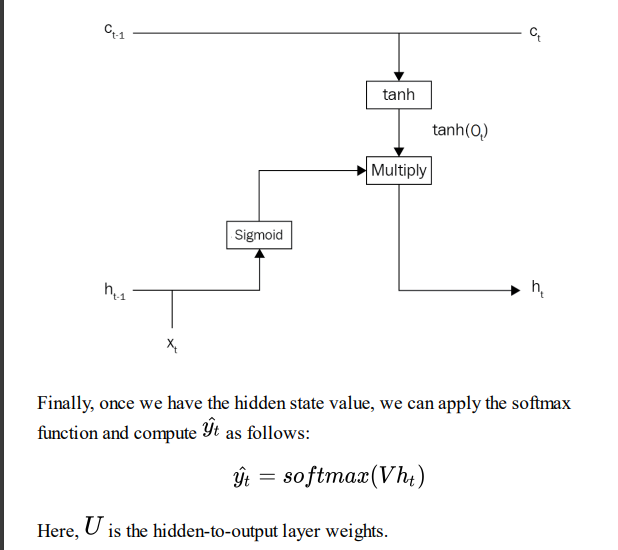

# Forward and backward propagation in LSTM

 Cell state and hidden states are shared across time
steps, meaning that the LSTM computes the cell state, $ Z_{t} $ , and hidden state, $ b_{t} $ ,
at time step t, and sends it to the next time step:

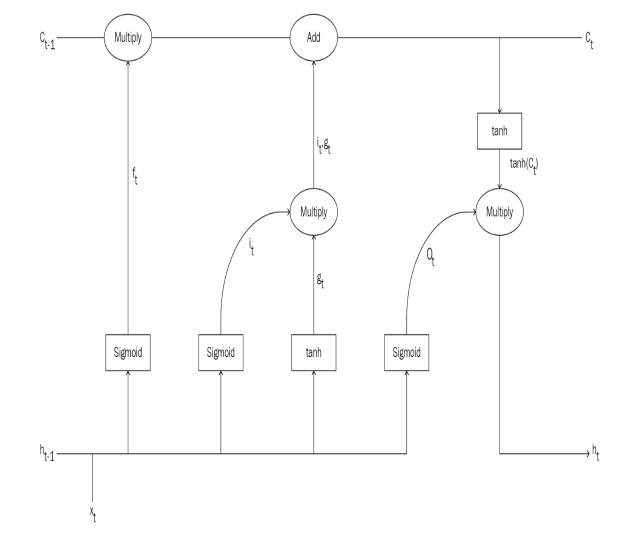

The complete forward propagation steps in the LSTM cell can be given as
follows:

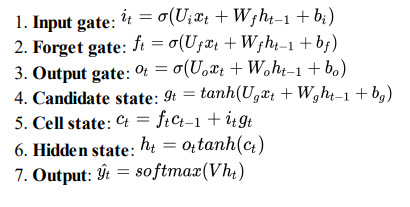

**Backpropagation in LSTM**

We use cross-entropy as a loss function,
then the loss, L, at time step t is given by the following equation:

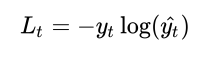

Our final loss is the sum of loss at all time steps, and can be given as
follows:

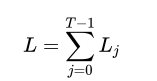

We minimize the loss using gradient descent. We find the derivative of loss
with respect to all of the weights used in the network and find the optimal
weights to minimize the loss:

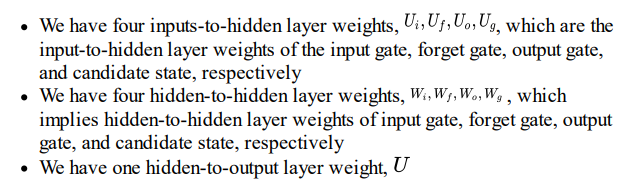

The weight update
rule is given by the following equation:
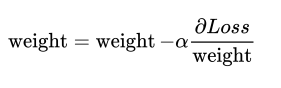

# Predicting Bitcoin price using LSTM

We will learn how to
predict Bitcoin prices using an LSTM network.


In [50]:
# Required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import tensorflow.compat.v1 as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [51]:
df = pd.read_csv("/content/btc.csv")
df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,5/26/2018,BTCUSD,7459.11,7640.46,7380.00,7520.00,2722.80,2.042265e+07
1,5/25/2018,BTCUSD,7584.15,7661.85,7326.94,7459.11,8491.93,6.342069e+07
2,5/24/2018,BTCUSD,7505.00,7734.99,7269.00,7584.15,11033.72,8.293137e+07
3,5/23/2018,BTCUSD,7987.70,8030.00,7433.19,7505.00,14905.99,1.148104e+08
4,5/22/2018,BTCUSD,8393.44,8400.00,7950.00,7987.70,6589.43,5.389753e+07


In [52]:
#We need only the Close column to make predictions
data = df['Close'].values

In [53]:
# we standardize the data and bring it to the same scale:
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

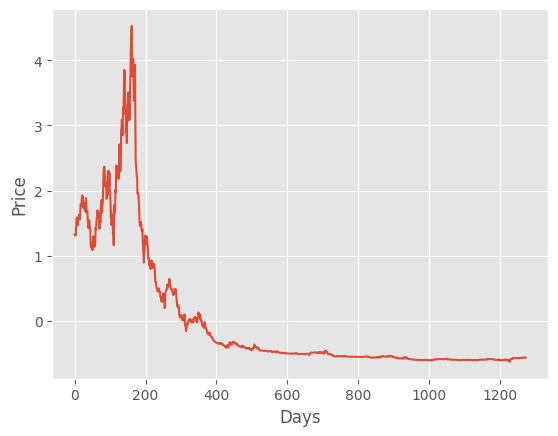

In [54]:
# plot and observe the trend of bitcoin price changes
plt.plot(data)
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


We move the x values window_size times ahead
and get the y values. For instance, as shown in the following table with
window_size equal to 1, the 'y' values are just one time step ahead of the 'x' values:

In [55]:
# get_data() function is defined as follows:
def get_data(data, window_size):
  X = []
  y = []
  i = 0
  while (i + window_size) <= len(data) - 1:
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
    i += 1
  assert len(X) == len(y)
  return X, y

In [56]:
# choosing window_size as 7 and generate the input and output:
X, y = get_data(data, window_size = 7)

In [57]:
#Considering the first 1000 points as the train set and the rest of the points in the dataset as the test set:
#train set
X_train = np.array(X[:1000])
y_train = np.array(y[:1000])
#test set
X_test = np.array(X[1000:])
y_test = np.array(y[1000:])



In [58]:
X_train.shape

(1000, 7, 1)

Here,
- sample size is 1000
- 7 specifies the window_size(time_steps)
- 1 specifies the dimension of our dataset(features)


## Defining the parameters

In [59]:
# define the network parameters as shown:
batch_size = 7
window_size = 7
hidden_layer = 256
learning_rate = 0.001

In [60]:
tf.compat.v1.disable_eager_execution()

In [61]:
# Define placeholders for our input and output:
input = tf.placeholder(tf.float32, [batch_size, window_size, 1])
target = tf.placeholder(tf.float32, [batch_size, 1])

In [62]:
#The weights of the input gate are defined as follows:
U_i = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
W_i = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
b_i = tf.Variable(tf.zeros([hidden_layer]))


In [63]:
# The weights of the forget gate are defined as follows:
U_f = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
W_f = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
b_f = tf.Variable(tf.zeros([hidden_layer]))

In [64]:
# The weights of the output gate are defined as given:
U_o = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
W_o = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
b_o = tf.Variable(tf.zeros([hidden_layer]))

In [65]:
# The weights of the candidate state are defined as follows:
U_g = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
W_g = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
b_g = tf.Variable(tf.zeros([hidden_layer]))


In [66]:
# The output layer weight is given as follows:
V = tf.Variable(tf.truncated_normal([hidden_layer, 1], stddev=0.05))
b_v = tf.Variable(tf.zeros([1]))

## Define the LSTM cell

LSTM_cell
takes the input, previous hidden state, and previous cell state as inputs, and
returns the current cell state and current hidden state as outputs:


In [67]:
def LSTM_cell(input, prev_hidden_state, prev_cell_state):


    it = tf.sigmoid(tf.matmul(input, U_i) + tf.matmul(prev_hidden_state, W_i) + b_i)

    ft = tf.sigmoid(tf.matmul(input, U_f) + tf.matmul(prev_hidden_state, W_f) + b_f)

    ot = tf.sigmoid(tf.matmul(input, U_o) + tf.matmul(prev_hidden_state, W_o) + b_o)

    gt = tf.tanh(tf.matmul(input, U_g) + tf.matmul(prev_hidden_state, W_g) + b_g)

    ct = (prev_cell_state * ft) + (it * gt)

    ht = ot * tf.tanh(ct)

    return ct, ht

## Defining forward Propagation

Now, we will perform forward propagation and predict the output

In [68]:
#initialize the list called y_hat for storing the predicted output
y_hat = []

#for each batch we compute the output and store it in the y_hat list
for i in range(batch_size):

    #initialize hidden state and cell state for each batch
    hidden_state = np.zeros([1, hidden_layer], dtype=np.float32)
    cell_state = np.zeros([1, hidden_layer], dtype=np.float32)


    #compute the hidden state and cell state of the LSTM cell for each time step
    for t in range(window_size):
        cell_state, hidden_state = LSTM_cell(tf.reshape(input[i][t], (-1, 1)), hidden_state, cell_state)

    #compute y_hat and append it to y_hat list
    y_hat.append(tf.matmul(hidden_state, V) + b_v)

##Defining Backpropagation

After performing forward propagation and predicting the output, we compute
the loss. We use mean squared error as our loss function, and the total loss is
the sum of losses across all of the time steps:


In [69]:
losses = []
for i in range(len(y_hat)):
    losses.append(tf.losses.mean_squared_error(tf.reshape(target[i], (-1, 1)), y_hat[i]))

loss = tf.reduce_mean(losses)



In [70]:
gradients = tf.gradients(loss, tf.trainable_variables())
clipped, _ = tf.clip_by_global_norm(gradients, 4.0)


In [71]:
optimizer = tf.train.AdamOptimizer(learning_rate).apply_gradients(zip(gradients,
tf.trainable_variables()))

## Training the LSTM model

In [72]:
session = tf.Session()
session.run(tf.global_variables_initializer())

epochs = 100

for i in range(epochs):

    train_predictions = []
    index = 0
    epoch_loss = []

    while(index + batch_size) <= len(X_train):
        X_batch = X_train[index:index+batch_size]
        y_batch = y_train[index:index+batch_size]

        #predict the price and compute the loss
        predicted, loss_val, _ = session.run([y_hat, loss, optimizer], feed_dict={input:X_batch, target:y_batch})

        #store the loss in the epoch_loss list
        epoch_loss.append(loss_val)

        #store the predictions in the train_predictions list
        train_predictions.append(predicted)
        index += batch_size

    if (i % 10)== 0:
        print('Epoch {}, Loss: {} '.format(i,np.mean(epoch_loss)))

Epoch 0, Loss: 0.19160300493240356 
Epoch 10, Loss: 0.050654392689466476 
Epoch 20, Loss: 0.025693994015455246 
Epoch 30, Loss: 0.02612738311290741 
Epoch 40, Loss: 0.008684901520609856 
Epoch 50, Loss: 0.011015759781002998 
Epoch 60, Loss: 0.010816346853971481 
Epoch 70, Loss: 0.010057155042886734 
Epoch 80, Loss: 0.00881750788539648 
Epoch 90, Loss: 0.007841902785003185 


## Making predictions using the LSTM model

In [73]:
predicted_output = []
i = 0
while i+batch_size <= len(X_test):

    output = session.run([y_hat],feed_dict={input:X_test[i:i+batch_size]})
    i += batch_size
    predicted_output.append(output)


In [74]:
predicted_output[0]

[[array([[-0.6018058]], dtype=float32),
  array([[-0.5999154]], dtype=float32),
  array([[-0.59885323]], dtype=float32),
  array([[-0.59801006]], dtype=float32),
  array([[-0.59769094]], dtype=float32),
  array([[-0.5987909]], dtype=float32),
  array([[-0.59579015]], dtype=float32)]]

In [75]:
predicted_values_test = []
for i in range(len(predicted_output)):
    for j in range(len(predicted_output[i][0])):
        predicted_values_test.append(predicted_output[i][0][j])


In [76]:
predicted_values_test[0]

array([[-0.6018058]], dtype=float32)

In [77]:
len(predicted_values_test)

266

In [80]:
# we took the first 1000 points as a training set, we make predictions for time steps greater than 1000:
predictions = []
for i in range(1280):
      if i >= 1000:
        predictions.append(predicted_values_test[i-1019][0])
      else:
        predictions.append(np.full(predicted_values_test[0][0].shape, None))

In [81]:
predictions = np.array(predictions)

print(f"Data Shape: {data.shape}. \nPredictions Shape: {predictions.shape}")

Data Shape: (1273, 1). 
Predictions Shape: (1280, 1)


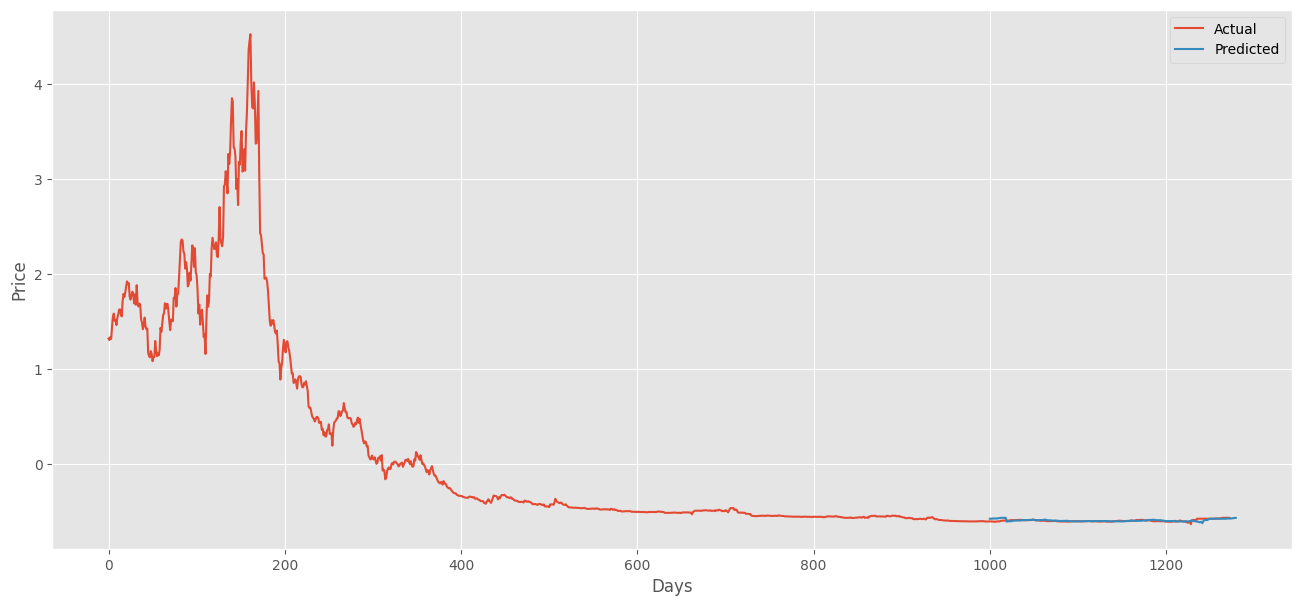

In [83]:
plt.figure(figsize=(16, 7))
plt.plot(data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


The actual value is shown in red and the
predicted value is shown in blue. As we are making predictions for time
steps greater than 1000, you can see after time step 1000, the red and blue
lines into each other, which implies that our model has correctly predicted
the actual values

# GRUs (Gate Recurrent Unit)

Gated Recurrent Units (GRU) cell, which acts as a
simplified version of the LSTM cell. Unlike the LSTM cell, the GRU cell has
only two gates and one hidden state.

As shown in the following diagram, a GRU cell has only two gates, called the
update gate and the reset gate, and one hidden state:

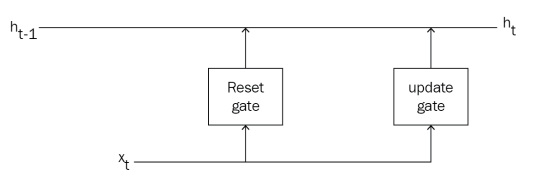

**Update Gate**

The update gate helps to decide what information from the previous time
step, $ W_{hy} $ , can be taken forward to the next time step, $ b_{h} $. It is basically a
combination of an input gate and a forget gate, which we learned about in
LSTM cells.

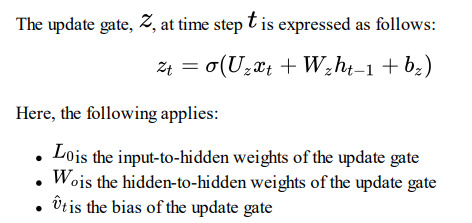

The following diagram shows the update gate.

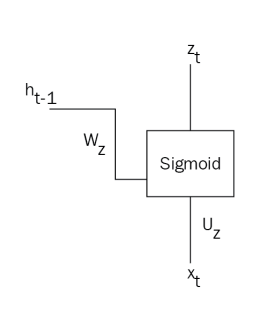

**Reset Gate**

The reset gate helps to decide how to add the new information to the memory,
that is, how much of the past information it can forget.

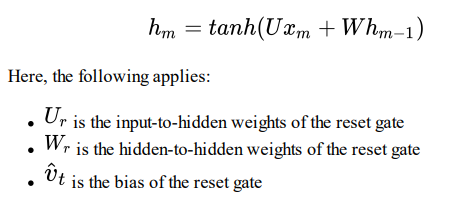

The reset gate is shown in the following diagram:

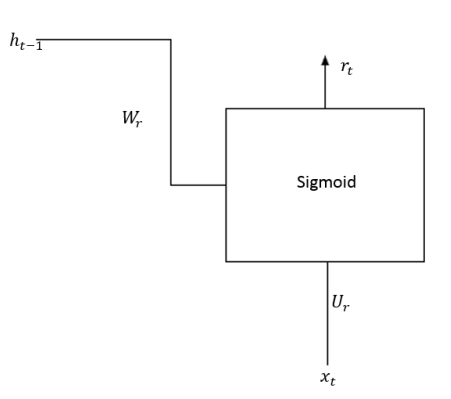





## Updating hidden state

We create a new state called the content state, for holding the
information. We know that the reset gate is used to remove information that is
not required.

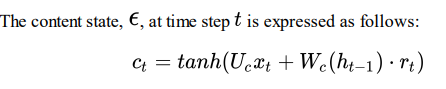

The following diagram shows how the content state is created with the reset
gate:
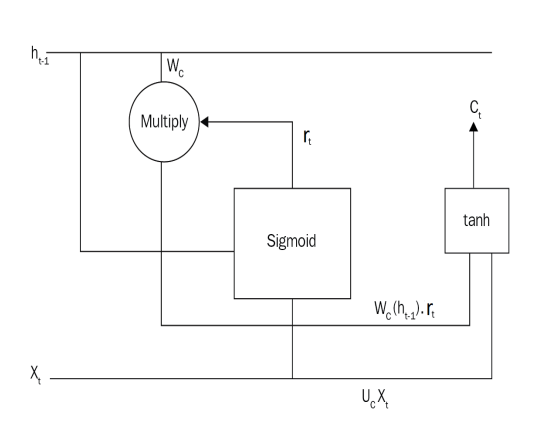

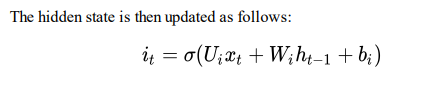

Once the hidden state is computed, we can apply the softmax function and
compute the output as follows:

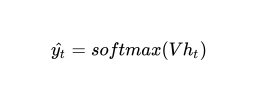


### Forward propagation in GRU cell

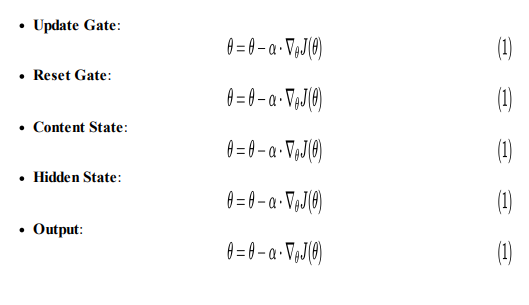

### Backpropagation in a GRU cell

The total loss, , is the sum of losses at all time steps, and can be given as
follows:

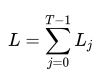

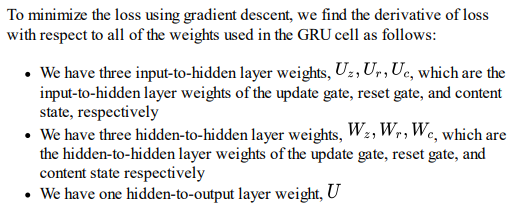


## Defining the weights


In [84]:
import tensorflow as tf

# Define the initializer
init = tf.keras.initializers.GlorotUniform()  # Equivalent to `glorot_uniform` initializer

# Define the vocab size and hidden size
vocab_size = 10000  # Example vocab size
hidden_size = 512   # Example hidden size

# Weights for the update gate
Uz = tf.Variable(init(shape=(vocab_size, hidden_size)), name="Uz")
Wz = tf.Variable(init(shape=(hidden_size, hidden_size)), name="Wz")
bz = tf.Variable(tf.zeros([hidden_size]), name="bz")

# Weights for the reset gate
Ur = tf.Variable(init(shape=(vocab_size, hidden_size)), name="Ur")
Wr = tf.Variable(init(shape=(hidden_size, hidden_size)), name="Wr")
br = tf.Variable(tf.zeros([hidden_size]), name="br")

# Weights for the candidate (content) state
Uc = tf.Variable(init(shape=(vocab_size, hidden_size)), name="Uc")
Wc = tf.Variable(init(shape=(hidden_size, hidden_size)), name="Wc")
bc = tf.Variable(tf.zeros([hidden_size]), name="bc")

# Weights for the output layer
V = tf.Variable(init(shape=(hidden_size, vocab_size)), name="V")
by = tf.Variable(tf.zeros([vocab_size]), name="by")



### Defining forward propagation

In [85]:
def gru_cell_forward(x_t, h_t_prev, Uz, Wz, bz, Ur, Wr, br, Uc, Wc, bc, V, by):
    # Update gate
    zt = tf.sigmoid(tf.matmul(x_t, Uz) + tf.matmul(h_t_prev, Wz) + bz)

    # Reset gate
    rt = tf.sigmoid(tf.matmul(x_t, Ur) + tf.matmul(h_t_prev, Wr) + br)

    # Candidate hidden state
    ct = tf.tanh(tf.matmul(x_t, Uc) + tf.matmul(rt * h_t_prev, Wc) + bc)

    # New hidden state
    h_t = (1 - zt) * ct + zt * h_t_prev

    # Output
    y_hat_t = tf.matmul(h_t, V) + by

    return y_hat_t, h_t

# Random input for demonstration
x_t = tf.random.normal([batch_size, vocab_size])
h_t_prev = tf.random.normal([batch_size, hidden_size])

# Perform forward propagation
y_hat_t, h_t = gru_cell_forward(x_t, h_t_prev, Uz, Wz, bz, Ur, Wr, br, Uc, Wc, bc, V, by)

print("Output (y_hat_t) shape:", y_hat_t.shape)  # (batch_size, vocab_size)
print("Hidden state (h_t) shape:", h_t.shape)    # (batch_size, hidden_size)

Output (y_hat_t) shape: (7, 10000)
Hidden state (h_t) shape: (7, 512)


# Bidirectional RNNs

One hidden layer moves forward
through time from the start of the sequence, while the other hidden layer
moves backward through time from the end of the sequence.

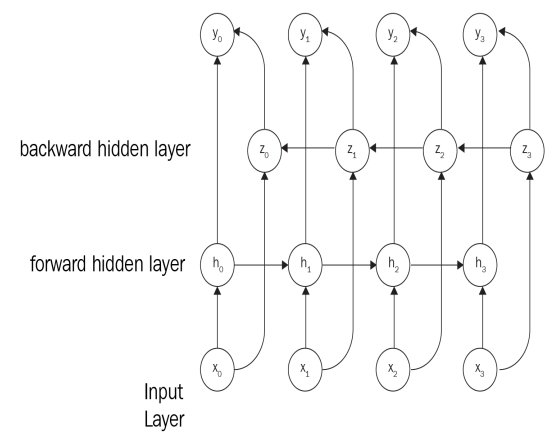

Bidirectional RNNs have been used in various applications, such as **part-of-speech (POS)** tagging, in which it is vital to know the word before and after
the target word, language translation, predicting protein structure, dependency
parsing, and more.

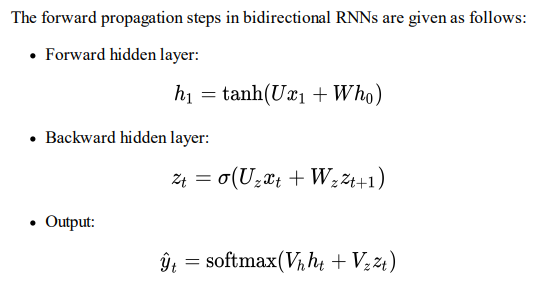

In [89]:
# we use the LSTM cell in the bidirectional RNN
# Import rnn from TensorFlow contrib as shown
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Bidirectional


In [90]:
# Define forward and backward hidden layers:
# Number of hidden units
num_hidden = 64  # Example value

# Define the bidirectional LSTM
forward_hidden_layer = LSTM(num_hidden, return_sequences=True)
backward_hidden_layer = LSTM(num_hidden, return_sequences=True, go_backwards=True)

# Wrap them in Bidirectional
bidirectional_rnn = Bidirectional(forward_hidden_layer, backward_layer=backward_hidden_layer)


In [91]:
#Apply the Bidirectional RNN:
# Define example input (batch_size, timesteps, input_dim)
input_data = tf.random.normal([32, 10, 128])  # Example shape

# Get the outputs from the Bidirectional RNN
outputs = bidirectional_rnn(input_data)
print("Output shape:", outputs.shape)  # (batch_size, timesteps, num_hidden * 2)


Output shape: (32, 10, 128)


# Deep RNNs

When we have an RNN with more than one hidden layer, hidden layers
at the later layers will be computed by taking the previous hidden state and the
previous layer's output as input, as shown in the following diagram:

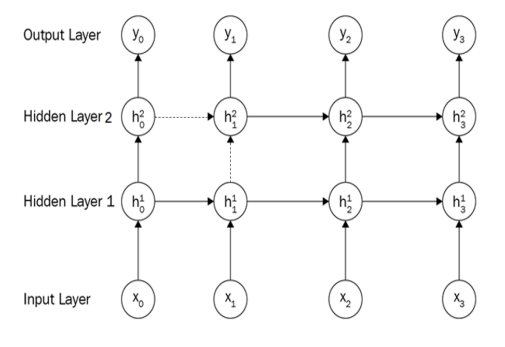



# Language Translation Using the seq2seq model

# Language Translation Using the seq2seq model

The many-to-many architecture of an RNN is essentially the sequence-to-sequence model, or seq2seq. Its ability to transfer an arbitrary-length input sequence to an arbitrary-length output has led to its employment in a variety of applications.
In most real-world scenarios, input and output sequences vary in length. For
 instance, let's take the language translation task, during which we need to
 convert a sentence from a source language to a target language. Let's assume
 we are converting from English (source) to French (target).


 The encoder learns the representation (embeddings) of the input sentence, but
 what is a representation? Representation, or embedding, is basically a vector
 comprising the meaning of the sentence. It is also called the thought vector
 or context vector. Once the encoder learns the embedding, it sends the
 embedding to the decoder. The decoder takes this embedding (thought vector)
 as input and tries to construct a target sentence. So, the decoder tries to
 generate the French translation for the English sentence.As you can see in the following diagram, the encoder takes the input English
 sentence, learns the embeddings, and feeds the embeddings to the decoder,
 and then the decoder generates the translated French sentence using those
 embeddings

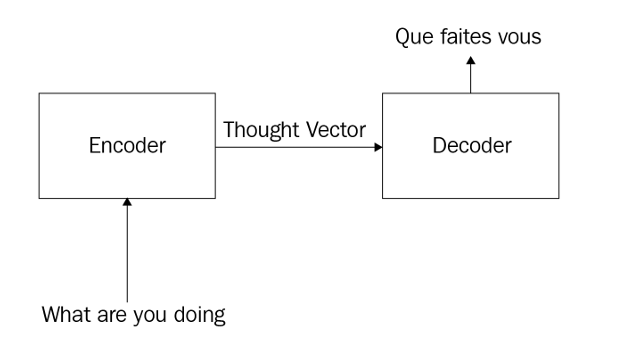

# Encoder
An encoder is basically an RNN with LSTM or GRU cells. It can also be a bidirectional RNN. We feed the input sentence to an encoder and, instead of taking the output, we take the hidden state from the final time step as the embeddings. Let's better understand encoders with an example. Consider we are using an RNN with a GRU cell and the input sentence is what are you doing. Let's represent the hidden state of the encoder with e:

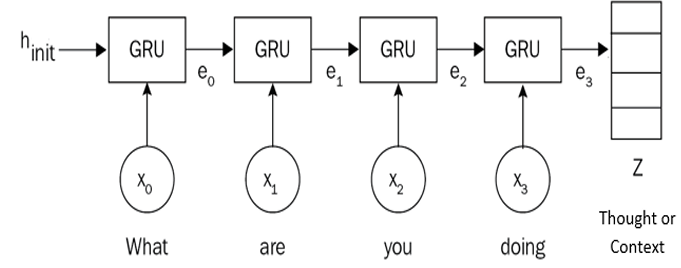

The preceding diagram shows how the encoder computes the thought vectors;
 this is explained as follows:
 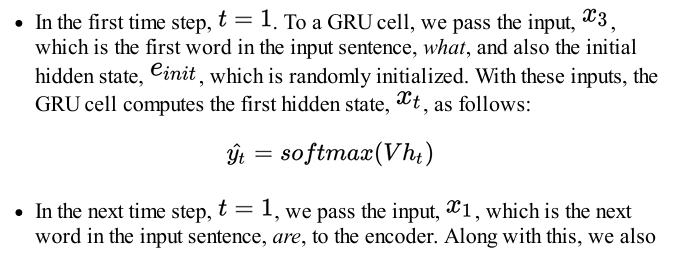
 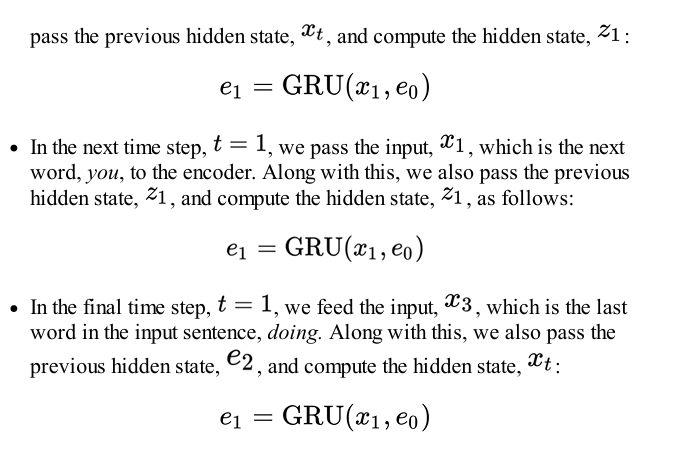

Thus,  xt  is our final hidden state. We learned that the RNN captures the context of all the words it has seen so far in its hidden state. Since  xt  is the final hidden state, it holds the context of all the words that the network has seen, which will be all the words in our input sentence, that is, what, are, you, and doing.

Since the final hidden state,  xt , holds the context of all the words in our input sentence, it holds the context of the input sentence, and this essentially forms our embedding,  z , which is otherwise called a thought or context vector, as follows:
z=e3
We feed the context vector,  z , to the decoder to convert it to the target sentence.

# Decoder
 Now, we will learn how the decoder generates the target sentence by using the
 thought vector, $z$, generated by the encoder. A decoder is an RNN with LSTM
 or GRU cells. The goal of our decoder is to generate the target sentence for
 the given input (source) sentence.

 We know that we start off an RNN by initializing its initial hidden state with
 random values, but for the decoder's RNN, we initialize the hidden state with
 the thought vector, $z$, generated by the encoder, instead of initializing them
 with random values. The decoder network is shown in the following diagram:

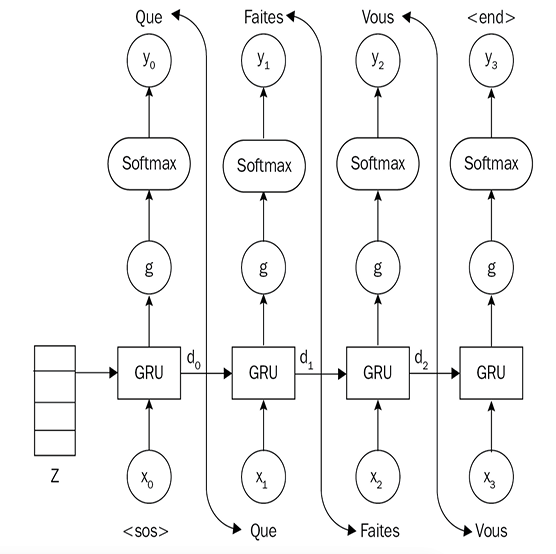

But, what should be the input to the decoder? We simply pass $<sos>$ as an
 input to the decoder, which indicates the start of the sentence. So, once the
 decode receives $<sos>$, it tries to predict the actual starting word of the target
 sentence. Let's represent the decoder hidden state by $d$.

 At the first time step, $t=1$, we feed the first input, which is $<sos>$, to the
 decoder, and along with it, we pass the thought vector as the initial hidden
 state as follows:

$$d_0 = GRU(z,x_{sos})$$

We feed the decoder hidden state, $d_0$, to $g(.)$, which returns the score for all
 the words in our vocabulary to be the first output word. That is, the output
 word at a time step,  is computed as follows:
 $$s_0 = g(d_0)$$

Instead of having raw scores, we convert them into probabilities. Since we
learned that the softmax function squashes values between 0 to 1, we use the
softmax function for converting the score, $z$, into a probability, $p$:
$$p_0 = softmax(s_0)$$

Thus, we have probabilities for all the French words in our vocabulary to be
 the first output word. We select the word that has the highest probability as the
 first output word using the argmax function:
 $$y_0 = argmax(p_0)$$
 So, we have predicted that the first output word, $y_1$, is *Que*, as shown in the
 preceding diagram.

  On the next time step, $t=1$, we feed the output word predicted at the
 previous time step, $y_1$, as input to the decoder. Along with it, we also pass the
 previous hidden state, $d_0$:
 $$d_1 = GRU(d_0,y_0)$$

 Then, we compute the score for all the words in our vocabulary to be the next
 output word, that is, the output word at time step $t=1$:
 $$s_0 = g(d_0)$$
 Then, we convert the scores to probabilities using the softmax function:
 $$p_0 = softmax(s_0)$$
 Next, we select the word that has the highest probability as the output word, $y_1$
, at a time step, $t=1$:
$$y_0 = argmax(p_0)$$

Thus, we initialize the decoder's initial hidden state with $z$, and, on every
 time step, $t$, we feed the predicted output word from the previous time step, $y_{t-1}$
, and the previous hidden state, $d_{t-1}$, as an input to the decoder, $v_t$, at
 the current time step, and predict the current output, $y_t$.

Thus, this is how the seq2seq model converts the source sentence to the target
sentence.

# Attention is all we need
We just learned how the seq2seq model works and how it translates a sentence from the source language to the target language. We learned that a context vector is basically a hidden state vector from the final time step of an
encoder, which captures the meaning of the input sentence, and it is used by
the decoder to generate the target sentence.

But when the input sentence is long, the context vector does not capture the
meaning of the whole sentence, since it is just the hidden state from the final
time step. So, instead of taking the last hidden state as a context vector and
using it for the decoder, we take the sum of all the hidden states from the
encoder and use it as a context vector.

How does an attention mechanism work? Let's say we have three hidden
 states of an encoder, $x_t$, $z_1$, and $z_1$, and a decoder hidden state, $d_0$, as
 shown in the following diagram:

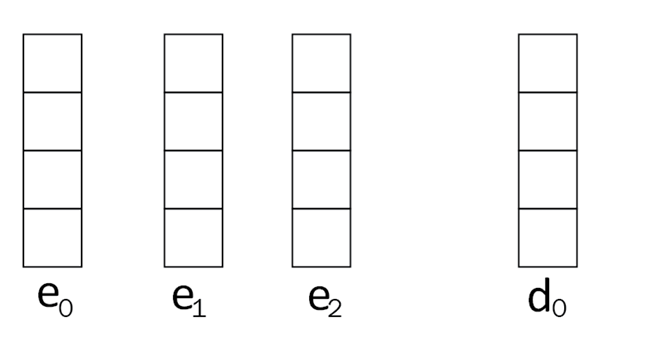

Now, we need to know the importance of all the hidden states of an encoder to
 generate a target word at time step $t$, So, we take each encoder hidden state, $z$
, and decoder hidden state, $d_0$, and feed them to a function, $f(.)$, which is
 called a **score function** or **alignment function**, and it returns the score for
 each of the encoder hidden states indicating their importance. But what is this
 score function? There are a number of choices for the score function, such as
 dot product, scaled dot product, cosine similarity, and more.

 We use a simple dot product as the score function; that is, the dot product
 between the encoder hidden states and the decoder hidden states. For
 instance, to know the importance of $x_t$ in generating the target word, we
 simply compute the dot product between $x_t$ and $d_0$, which gives us a score
 indicating how similar $x_t$ and $d_0$ are.

 Once we have the score, we convert them into probabilities using the softmax
 function as follows:
 $$x = 0.7 - (0.15 *1.4)$$
 These probabilities, $x_3$, are called **attention weight**s.

As you can see in the following diagram, we compute the similarity score
 between each of the encoder's hidden states with the decoder's hidden state
 using a function, $f(.)$. Then, the similarity score is converted into
 probabilities using the softmax function, which are called attention weights:
 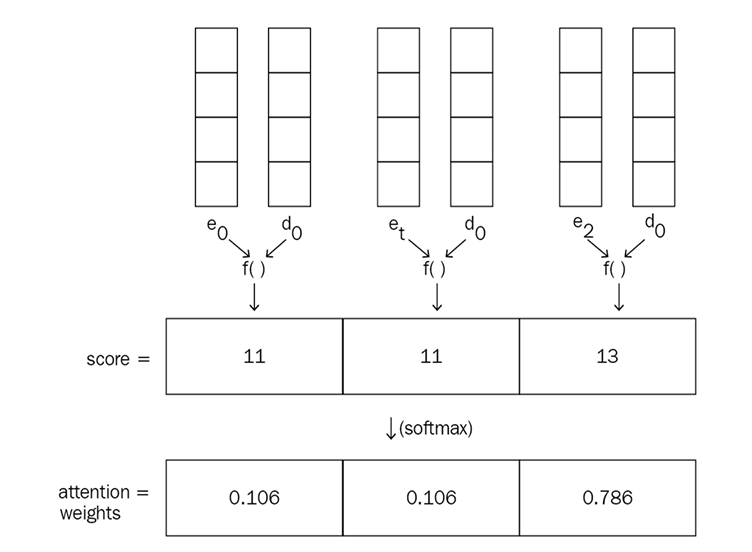


Thus, we have attention weights (probabilities) for each of the encoder's
 hidden states. Now, we multiply the attention weights with their
 corresponding encoder's hidden state, that is, $a_t.e_t$. As shown in the
 following diagram, the encoder's hidden state, $x_t$, is multiplied by 0.106,
is multiplied by 0.106, and $z_1$ is multiplied by 0.786:


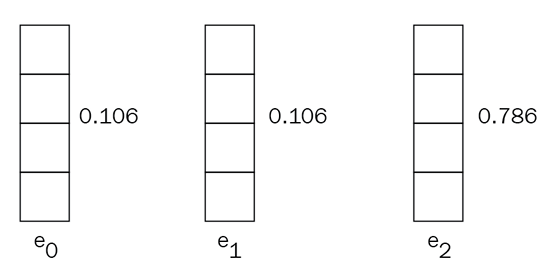

 Thus, to generate a target word at time step $t$, the decoder uses context vector $E$
 at time step $t$. With the attention mechanism, instead of taking the last hidden state as a context vector and using it for the decoder, we take the sum
 of all the hidden states from the encoder and use it as a context vector.


# Summary
This chapter explained how the LSTM cell fights the vanishing gradient issue by utilizing multiple gates. Next, we learned how to use TensorFlow's LSTM cell to forecast the price of Bitcoin.

 Following our examination of LSTM cells, we were introduced to the GRU cell, a condensed form of LSTM. Additionally, we studied bidirectional RNNs, which comprised two layers of hidden states. One layer advanced through time from the beginning of the sequence, while the other layer proceeded backward from the conclusion.

 The seq2seq model, which transfers an input sequence of varied length to an output sequence of varying length, was covered at the end of the chapter.
 We also learned how the seq2seq model employs the attention mechanism to concentrate on crucial information.
 Convolutional neural networks and its application to image recognition will be covered in the upcoming chapter.